In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib notebook
%matplotlib notebook
plt.rcParams.update({'font.size': 14})

'''Measurement with Battery'''
# Board with Diode -> Input voltage = 4.22 to 4.26 V -> Output HV (100MOhm + Probe) = 3300 to 3380 V
# Board without Diode -> Input voltage = 5.06V -> Output HV (100MOhm + Probe) = 4380 to 4500 V

'''Measurement with power supply'''
# Input Voltage
x = np.array([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.1]) # Input voltage

# Output HV (Probe only)
y1 = np.array([[1380, 1460], [2380, 2460], [3180, 3260], [3900, 3980], [4620, 4740], [5460, 5580], 
      [6100, 6260], [6980, 7140], [7740, 7900], [7880, 8120]])

# Output HV (100MOhm + Probe)
y2 = np.array([[660, 740], [1260, 1340], [1700, 1780], [2100, 2180], [2700, 2780], [3060, 3140], 
      [3500, 3580], [3940, 4020], [4340, 4420], [4420, 4500]])

In [2]:
xx = np.array([x,x]).T.reshape(-1, 1)
y1F = y1.reshape(-1, 1)
y2F = y2.reshape(-1, 1)

# Regression for (Probe only) measurements
reg1 = LinearRegression().fit(xx, y1F)
print("Regression for (Probe only) measurements R2 = %.6f" % reg1.score(xx, y1F))
y1P = reg1.predict(x.reshape(-1, 1))

# Regression for (Probe only and Input <= 2.0 V) measurements
reg11 = LinearRegression().fit(xx[:6], y1F[:6])
print("Regression for (Probe only and Input <= 2.0 V) measurements R2 = %.6f" % reg11.score(xx, y1F))
y11P = reg11.predict(x.reshape(-1, 1))

# Regression for (100MOhm + Probe) measurements
reg2 = LinearRegression().fit(xx, y2F)
print("Regression for (100MOhm + Probe) measurements R2 = %.6f" % reg2.score(xx, y2F))
y2P = reg2.predict(x.reshape(-1, 1))

ratio = y1F/y2F
ratioMean = np.mean(ratio[:6])
print("Ratio: Mean = %.3f (STD = %.3f)" % (ratioMean, np.std(ratio[:6])))

Regression for (Probe only) measurements R2 = 0.998051
Regression for (Probe only and Input <= 2.0 V) measurements R2 = 0.941208
Regression for (100MOhm + Probe) measurements R2 = 0.996629
Ratio: Mean = 1.915 (STD = 0.091)


In [3]:
board = np.array([4.24, 5.06]).reshape(-1, 1)

y11B = reg11.predict(board)
y1B = reg1.predict(board)
y2B = reg2.predict(board)

print("Board with diode effect input = %.2f V, Predicted Voltage = %.1f, Direct measure = %.1f, Ideal = %.1f V" %
     (board[0], y11B[0], y1B[0],  y2B[0]*2))
print("Pure amp component: effect input = %.2f V, Predicted Voltage = %.1f, Direct measure = %.1f, Ideal = %.1f V" %
     (board[1], y11B[1], y1B[1], y2B[1]*2))

Board with diode effect input = 4.24 V, Predicted Voltage = 7285.3, Direct measure = 6641.7, Ideal = 7476.2 V
Pure amp component: effect input = 5.06 V, Predicted Voltage = 8761.3, Direct measure = 7928.0, Ideal = 8957.1 V


<IPython.core.display.Javascript object>


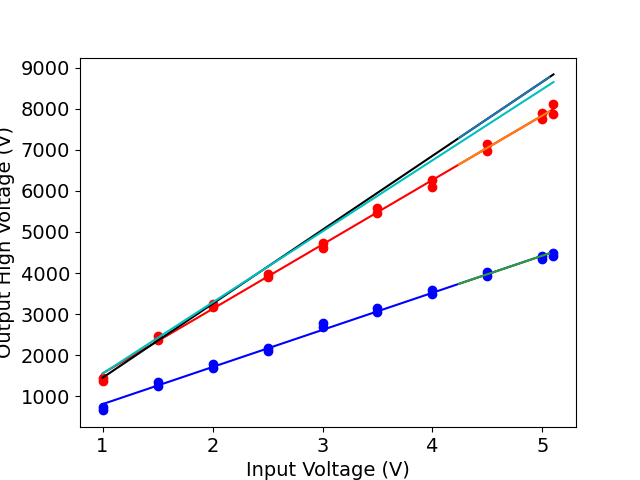

In [8]:
plt.plot(x, y1, 'ro'); # (Probe only) measurements
plt.plot(x, y2, 'bo'); # (100MOhm + Probe) measurements

line0, = plt.plot(x, y1P,color='r'); # (Probe only) regression
line1, = plt.plot(x, y11P,color='k'); # (Probe only and Input <= 2.0 V) regression
line2, = plt.plot(x, y2P,color='b'); # (100MOhm + Probe) regression 
line3, = plt.plot(x, y2P*ratioMean, 'c-'); # (100MOhm + Probe) regression multiply by Ratio ((100MOhm + Probe)/Probe)

# plt.legend([line0, line1, line2, line3], 
#            ['(Probe only) regression', '(Probe only and Input <= 2.0 V) regression','(100MOhm + Probe) regression',
#             'Multiply (100MOhm + Probe)/Probe'])

plt.plot(board, y11B);
plt.plot(board, y1B);
plt.plot(board, y2B);
plt.xlabel('Input Voltage (V)');
plt.ylabel('Output High Voltage (V)');